In [1]:
#load library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import datetime as dt

In [3]:
###load the Uber 2014 data and count the trips by NTA
Uber2014 = pd.read_csv("../uber_2014_NTA.csv", sep = ",")
Uber2014.head()

,pickup_datetime,pickup_latitude,pickup_longitude,base,NTA
0,4/26/14 20:54,40.6102,-73.9624,B02682,BK43
1,9/1/2014 10:13:00,40.6102,-73.9611,B02598,BK43
2,8/15/2014 10:17:00,40.6102,-73.9610,B02598,BK43
3,8/18/2014 9:41:00,40.6102,-73.9609,B02617,BK43
4,9/10/2014 10:14:00,40.6103,-73.9623,B02598,BK43


In [5]:
Uber2014.dtypes

pickup_datetime      object
pickup_latitude     float64
pickup_longitude    float64
base                 object
NTA                  object
dtype: object

In [7]:
Uber2014["pickup_datetime"] = pd.to_datetime(Uber2014["pickup_datetime"])

In [9]:
Uber2014.head()

,pickup_datetime,pickup_latitude,pickup_longitude,base,NTA
0,2014-04-26 20:54:00,40.6102,-73.9624,B02682,BK43
1,2014-09-01 10:13:00,40.6102,-73.9611,B02598,BK43
2,2014-08-15 10:17:00,40.6102,-73.9610,B02598,BK43
3,2014-08-18 09:41:00,40.6102,-73.9609,B02617,BK43
4,2014-09-10 10:14:00,40.6103,-73.9623,B02598,BK43


In [91]:
NTA_counts2014 = Uber2014["NTA"].value_counts().reset_index() ##193 NTA
NTA_counts2014.columns = ["nta_code", "trip_count"]
NTA_counts2014.head()

,nta_code,trip_count
0,MN17,616172
1,MN13,423856
2,MN24,367005
3,MN23,363458
4,MN19,202878


In [93]:
#read demographic data
demo = pd.read_csv("../final 9/demographics.csv", sep = ",")
demo.head()

,nta_name,borough,nta_code,population,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,...,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income
0,Allerton-Pelham Gardens,Bronx,BX31,28903,1679,1706,1763,2039,1964,1703,...,797,773,1160,1764,1155,1562,765,427,61638,78489
1,Annadale-Huguenot-Prince's Bay-Eltingville,Staten Island,SI01,27770,1397,1698,1817,1880,1720,1594,...,571,405,1008,1523,1346,2075,1086,1151,88288,109187
2,Arden Heights,Staten Island,SI48,25238,1507,1540,1596,1752,1614,1561,...,337,516,707,1421,1611,2021,1047,740,89570,101627
3,Astoria,Queens,QN70,78793,3480,3037,3060,3392,6630,11586,...,3673,2816,4725,6463,4557,4698,1627,1197,54882,70094
4,Auburndale,Queens,QN48,19996,917,966,1063,1168,1214,1307,...,445,632,690,1417,1060,1237,589,433,70772,84402


In [94]:
##check how many NTA co-existed
interNTA = np.intersect1d(demo["nta_code"], NTA_counts2014["nta_code"])
interNTA.shape

(188,)

In [99]:
## intersect two data frame by nta_code
subsetdemo = pd.merge(demo, NTA_counts2014, how = "inner", on = ["nta_code"])
print(subsetdemo.shape)
subsetdemo.head()

(188, 34)


,nta_name,borough,nta_code,population,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,...,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income,trip_count
0,Allerton-Pelham Gardens,Bronx,BX31,28903,1679,1706,1763,2039,1964,1703,...,773,1160,1764,1155,1562,765,427,61638,78489,397
1,Annadale-Huguenot-Prince's Bay-Eltingville,Staten Island,SI01,27770,1397,1698,1817,1880,1720,1594,...,405,1008,1523,1346,2075,1086,1151,88288,109187,5
2,Arden Heights,Staten Island,SI48,25238,1507,1540,1596,1752,1614,1561,...,516,707,1421,1611,2021,1047,740,89570,101627,8
3,Astoria,Queens,QN70,78793,3480,3037,3060,3392,6630,11586,...,2816,4725,6463,4557,4698,1627,1197,54882,70094,16954
4,Auburndale,Queens,QN48,19996,917,966,1063,1168,1214,1307,...,632,690,1417,1060,1237,589,433,70772,84402,389


In [100]:
subsetdemo.columns

Index(['nta_name', 'borough', 'nta_code', 'population', 'under_5_years',
       '5-9_years', '10-14_years', '15-19_years', '20-24_years', '25-29_years',
       '30-34_years', '35-39_years', '40-44_years', '45-49_years',
       '50-54_years', '55-59_years', '60-64_years', 'over_65_years',
       'median_age', 'people_per_acre', 'households', 'less_than_10,000',
       '10000_to_14999', '15000_to_24999', '25000_to_34999', '35000_to_49999',
       '50000_to_74999', '75000_to_99999', '100000_to_149999',
       '150000_to_199999', '200000_or_more', 'median_income', 'mean_income',
       'trip_count'],
      dtype='object')

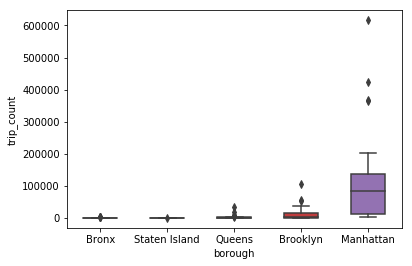

In [96]:
###trip count versus borough
bplot1 = sns.boxplot(x = "borough", y = "trip_count", data = subsetdemo, width = 0.5)

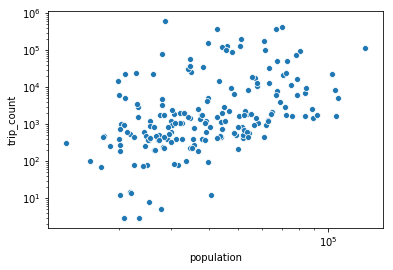

In [109]:
##trip counts versus population
fig, ax = plt.subplots()
ax.set(xscale = "log", yscale ="log")
sns.scatterplot(x = "population", y = "trip_count", data = subsetdemo, ax = ax)
plt.show()

#NOTE: need log transformation to see the correlation

NameError: name 'subsetdemo' is not defined

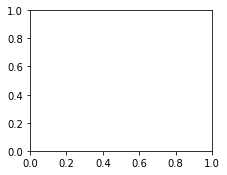

In [108]:
##check the age categories distribution versus trip counts
plt.figure(figsize = (15, 15))
for i in range(3,19):
    plt.subplot(5,4,i)
    x = subsetdemo.iloc[:,i]
    x = np.log(x)
    y = subsetdemo.trip_count
    y = np.log(y)
    correlation, _ = pearsonr(x, y)
    plt.scatter(x , y , data = subsetdemo)
    plt.title(label = subsetdemo.columns[i] + ", Cor = " + str(round(correlation, 3)))

#Note: the correlations between age and trip_count are different for age range

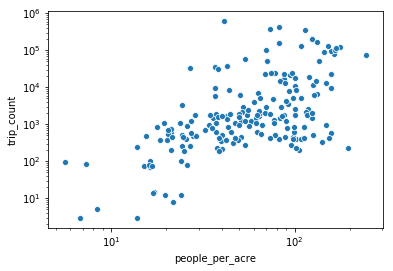

In [133]:
fig, ax = plt.subplots()
ax.set(xscale = "log", yscale ="log")
sns.scatterplot(x = "people_per_acre", y = "trip_count", data = subsetdemo, ax = ax)
plt.show()

#Note: very good correlation, population density is a better indicator than total population since NTA size are different

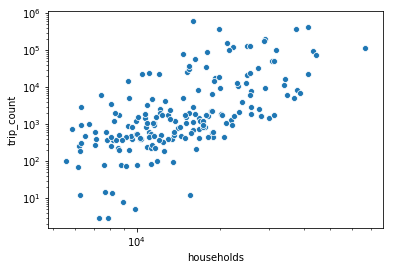

In [134]:
fig, ax = plt.subplots()
ax.set(xscale = "log", yscale ="log")
sns.scatterplot(x = "households", y = "trip_count", data = subsetdemo, ax = ax)
plt.show()

##also good infor, but may show correlation with other variable

In [135]:
corr1, _ = pearsonr(subsetdemo["households"], subsetdemo["population"]) ##strong collinearity
print("pearson cor = %.3f", corr1)

pearson cor = %.3f 0.9189145324689965


In [136]:
corr2, _ = pearsonr(subsetdemo["people_per_acre"], subsetdemo["population"]) ##
print("pearson cor = %.3f", corr2) 

pearson cor = %.3f 0.4458060166814308


In [137]:
corr3, _ = pearsonr(subsetdemo["people_per_acre"], subsetdemo["households"]) ##
print("pearson cor = %.3f", corr3) 

pearson cor = %.3f 0.5052229093014726


22
23
24
25
26
27
28
29
30
31
32
33


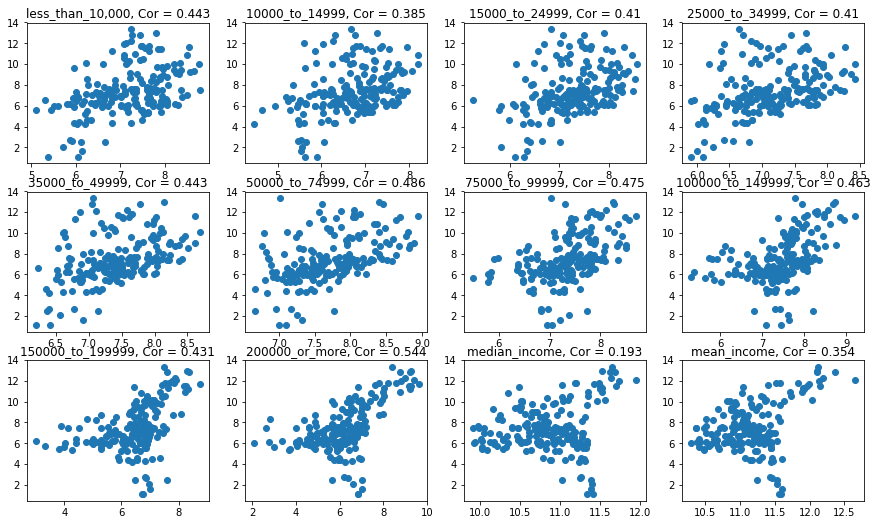

In [148]:
##check the age categories distribution versus trip counts
plt.figure(figsize = (15, 15))
for i in range(21,33):
    plt.subplot(5,4,i-20)
    x = subsetdemo.iloc[:,i]
    x = np.log(x)
    y = subsetdemo.trip_count
    y = np.log(y)
    correlation, _ = pearsonr(x, y)
    plt.scatter(x , y , data = subsetdemo)
    plt.title(label = subsetdemo.columns[i] + ", Cor = " + str(round(correlation, 3)))
    
##seems like middle class show stronger correlation.

In [ ]:
##basically, three types of features:
#(1) population density
#(2) population age composition
#(3) income composition
#some of them show correlation, may need to be use careful.
#use logarithm for data transformation helps to identify linear relation

In [ ]:
###check the time affect to trip count

In [83]:
Uber2014["month"] = Uber2014["pickup_datetime"].dt.month
Uber2014["yearday"] = Uber2014["pickup_datetime"].dt.strftime("%j")
Uber2014["day"] = Uber2014["pickup_datetime"].dt.date
Uber2014["monthday"] =  Uber2014["pickup_datetime"].dt.day
Uber2014["hour"] = Uber2014["pickup_datetime"].dt.hour
Uber2014["weekday"] = Uber2014["pickup_datetime"].dt.weekday  ##Monday = 0, Sunday = 6

,pickup_datetime,pickup_latitude,pickup_longitude,base,NTA,month,day,hour,weekday,monthday,yearday
0,2014-04-26 20:54:00,40.6102,-73.9624,B02682,BK43,4,2014-04-26,20,5,26,116
1,2014-09-01 10:13:00,40.6102,-73.9611,B02598,BK43,9,2014-09-01,10,0,1,244
2,2014-08-15 10:17:00,40.6102,-73.9610,B02598,BK43,8,2014-08-15,10,4,15,227
3,2014-08-18 09:41:00,40.6102,-73.9609,B02617,BK43,8,2014-08-18,9,0,18,230
4,2014-09-10 10:14:00,40.6103,-73.9623,B02598,BK43,9,2014-09-10,10,2,10,253


In [95]:
Uber2014.head()

,pickup_datetime,pickup_latitude,pickup_longitude,base,NTA,month,day,hour,weekday,monthday,yearday
0,2014-04-26 20:54:00,40.6102,-73.9624,B02682,BK43,4,2014-04-26,20,5,26,116
1,2014-09-01 10:13:00,40.6102,-73.9611,B02598,BK43,9,2014-09-01,10,0,1,244
2,2014-08-15 10:17:00,40.6102,-73.9610,B02598,BK43,8,2014-08-15,10,4,15,227
3,2014-08-18 09:41:00,40.6102,-73.9609,B02617,BK43,8,2014-08-18,9,0,18,230
4,2014-09-10 10:14:00,40.6103,-73.9623,B02598,BK43,9,2014-09-10,10,2,10,253


In [97]:
##check the distribution by month, by day, by day of the month, by day of the week
df_month = Uber2014["month"].value_counts().reset_index()
df_month["index"] = df_month["index"].astype(int)
df_month.columns = ["month", "trip_count"]

df_yearday = Uber2014["yearday"].value_counts().reset_index()
df_yearday["index"] = df_yearday["index"].astype(int)
df_yearday.columns = ["yearday", "trip_count"]

df_hour = Uber2014["hour"].value_counts().reset_index()
df_hour["index"] = df_hour["index"].astype(int)
df_hour.columns = ["hour", "trip_count"]

df_weekday = Uber2014["weekday"].value_counts().reset_index()
df_weekday["index"] = df_weekday["index"].astype(int)
df_weekday.columns = ["weekday", "trip_count"]

df_monthday = Uber2014["monthday"].value_counts().reset_index()
df_monthday["index"] = df_monthday["index"].astype(int)
df_monthday.columns = ["monthday", "trip_count"]

Text(0.5, 0, 'hour per day')

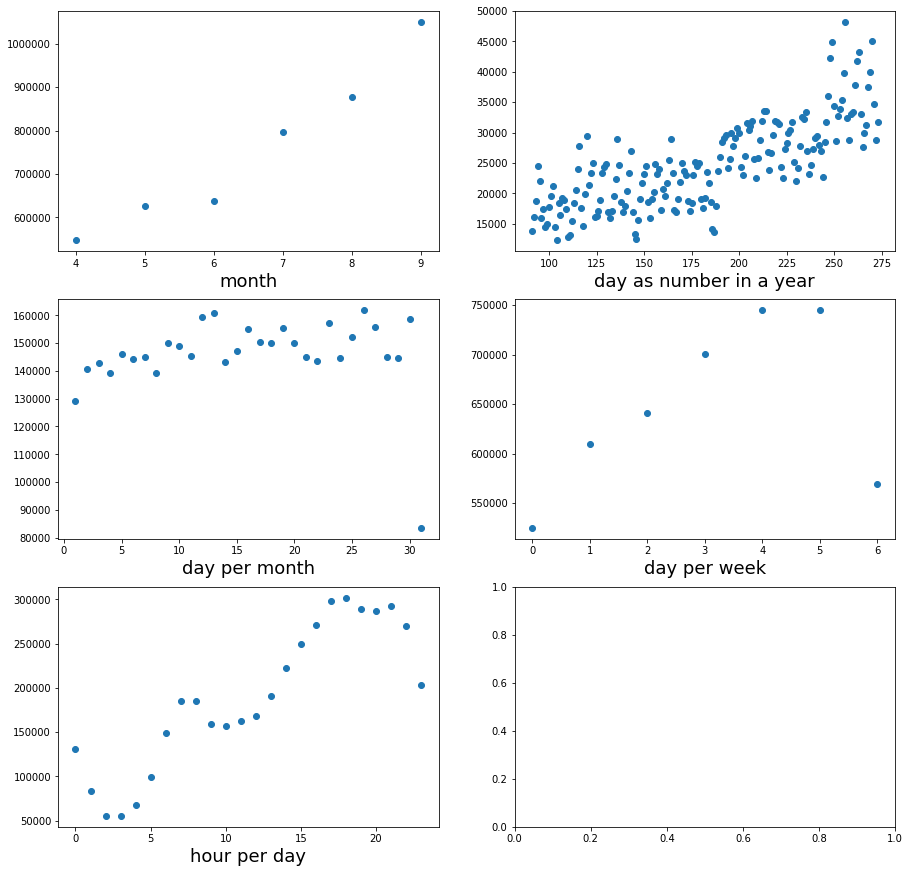

In [107]:
###draw plots to see the correlation
from pylab import rcParams
rcParams['figure.figsize'] = 15, 15
fig,ax = plt.subplots(3, 2)
plt.subplot(3,2,1)
plt.scatter(x = "month", y = "trip_count", data = df_month)
plt.xlabel('month', fontsize=18)
plt.subplot(3,2,2)
plt.scatter(x = "yearday", y = "trip_count", data = df_yearday)
plt.xlabel('day as number in a year', fontsize=18)
plt.subplot(3,2,3)
plt.scatter(x = "monthday", y = "trip_count", data = df_monthday)
plt.xlabel('day per month', fontsize=18)
plt.subplot(3,2,4)
plt.scatter(x = "weekday", y = "trip_count", data = df_weekday)
plt.xlabel('day per week', fontsize=18)
plt.subplot(3,2,5)
plt.scatter(x = "hour", y = "trip_count", data = df_hour)
plt.xlabel('hour per day', fontsize=18)

In [ ]:
###summary for timestamp information
#(1) month: keep increasing by month, may because the "general weather" gets warmer, or Uber is taking over the market!
#(2) days in year: similar trend as month
#(3) days in month: slightly increase, day 31 drop: months without 31 days
#(4) days in week: strong relation, increase by number, low in Sunday?? Interesting, maybe people prefer to stay home
#(5) hours in day: Very interesting, morning has small peak, afternoon rush hour the highest demand.